In [1]:
#!/usr/bin/python3
from math import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

The length of the inner U of a groove is 0.006604 m
The length of an arc between two grooves is 0.001533 m
The length around all those fins and grooves is 1.008948 m

Area of annular region between cylinders 0.000048 m^2
Additional area cut out by each groove 0.000004 m^2
Area of all the grooves 0.000481 m^2
Total flow area 0.000529 m^2

The flow area is 0.000529 m^2, A.
The flow perimeter is 1.388779 m, P.
The hydraulic diameter 0.001523 m, Dh.

The length of tubes is 0.254000 m, L.
The area of cold wall is 0.256273 m^2, Aw



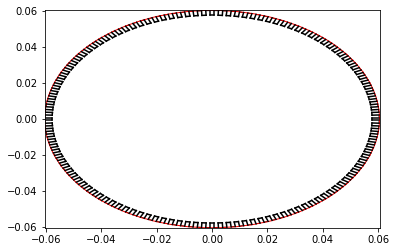

In [17]:
d2=4.76*0.0254 # (m) inner diameter of the outer tubular housing
d1=4.75*0.0254 # (m) diameter of the inner cold cylinder before
               # cutting any grooves

fig,ax=plt.subplots()

ax.set_xlim([-d2/2,d2/2])
ax.set_ylim([-d2/2,d2/2])

# outer housing
circle1=plt.Circle((0,0),d2/2,color='r',fill=False)
ax.add_artist(circle1)

groove_depth=0.1*0.0254 # m
groove_width=0.06*0.0254 # m
ngrooves=124

# shorter names
r=d1/2
w=groove_width
d=groove_depth

for groove in range(ngrooves):
    theta=360./ngrooves
    center_angle=groove*theta

    alpha=center_angle*pi/180
    x=r*cos(alpha)
    y=r*sin(alpha)

    dalpha=asin(w/2/r)

    xsl=r*cos(alpha+dalpha)
    ysl=r*sin(alpha+dalpha)
    xel=xsl-d*cos(alpha)
    yel=ysl-d*sin(alpha)
    
    xsr=r*cos(alpha-dalpha)
    ysr=r*sin(alpha-dalpha)
    xer=xsr-d*cos(alpha)
    yer=ysr-d*sin(alpha)
    
    # draw line at edge of each groove
    line=plt.plot([xsl,xel],[ysl,yel],color='black')
    line=plt.plot([xsr,xer],[ysr,yer],color='black')
    # and bottom of groove
    line=plt.plot([xel,xer],[yel,yer],color='black')

    alpha_deg=alpha*180/pi
    dalpha_deg=dalpha*180/pi
    arc=patches.Arc((0,0),2*r,2*r,0,alpha_deg+dalpha_deg,alpha_deg+theta-dalpha_deg)
    ax.add_patch(arc)

# Calculation of perimeter of all those grooves
pgroove=2*d+w # inner "U" of a groove
parc=(theta-2*dalpha_deg)*pi/180*r # outer arc length between two grooves
perimeter=ngrooves*(pgroove+parc)

print('The length of the inner U of a groove is %f m'%pgroove)
print('The length of an arc between two grooves is %f m'%parc)
print('The length around all those fins and grooves is %f m'%perimeter)

print()

# Calculation of area for flow
annulus=pi*(d2**2-d1**2)/4
agroove=d*w # area of one groove # approximately
aeps=((2*dalpha)/(2*pi))*pi*r**2-2*0.5*(w/2)*(r*cos(dalpha)) # area
                                                             # between
                                                             # the arc
                                                             # and the
                                                             # area of
                                                             # the
                                                             # groove
                                                             # on the
                                                             # previous
                                                             # line
agroove_total=agroove+aeps
agrooves=agroove_total*ngrooves
area=annulus+agrooves


print('Area of annular region between cylinders %f m^2'%annulus)
print('Additional area cut out by each groove %f m^2'%(agroove+aeps))
print('Area of all the grooves %f m^2'%agrooves)
print('Total flow area %f m^2'%area)
print()

a=area # (m^2) area for fluid flow
p=perimeter+pi*d2 # (m) perimeter of flow region

dh=4*a/p # (m) hydraulic diameter

print('The flow area is %f m^2, A.'%a)
print('The flow perimeter is %f m, P.'%p)
print('The hydraulic diameter %f m, Dh.'%dh)
print()

L=10.*0.0254 # (m) length of tube(s)
Aw=perimeter*L
print('The length of tubes is %f m, L.'%L)
print('The area of cold wall is %f m^2, Aw'%Aw)
print()

G is found from:

\begin{equation}
G = \frac{\dot{m}}{A}
\end{equation}

In [12]:
mdot=0.004 # (kg/s) mass flow rate
G=mdot/a # (kg/(m^2*s)) mass flow rate per unit area

print('G is %f kg/(m^2*s)'%G)

G is 7.564393 kg/(m^2*s)


The Reynolds Number is found from:

\begin{equation}
Re = \frac{D_hG}{\mu}
\end{equation}

In [4]:
mu=3.5e-5 # Pa*s

Re=dh*G/mu # should be dimensionless
print('The Reynolds number is %f'%Re)

The Reynolds number is 329.168843


The Prandelt Number is found from:

\begin{equation}
Pr = \frac{\mu C_p}{k_t}
\end{equation}

In [5]:
# thermal conductivity

kt=0.104 # W/(m*K)
p_psi=20. # PSI
p=p_psi*6894.76 # Pa

Tin=23.4 # (K) inlet temp
Tw=20.7 # (K) temperature of cold wall
Ts=(Tw+Tin)/2 # (K) temperature of film, with which we will exchange heat.

T=Tin
Cp=5841.605609

Pr=(mu*Cp)/(kt)
print('The Prandtl Number is %f.'%Pr)

The Prandtl Number is 1.965925.


The heat transfer coefficient is found from:

\begin{equation}
hc = \frac{Nuk_t}{D_h}
\end{equation}

In [6]:
Nu=3.657 # circular duct Barron Eq. (6.30)
fRe=64.00 # circular duct Barron Eq. (6.27)
hc=Nu*kt/dh
print('The heat transfer coefficient is %f W/(m^2*K)'%hc)

The heat transfer coefficient is 249.715564 W/(m^2*K)


The Ntu is found from:

\begin{equation}
Ntu = \frac{hcA_w}{\dot{m}C_p}
\end{equation}

In [7]:
Ntu=hc*Aw/(mdot*Cp)
print('The number of transfer units is %f'%Ntu)

The number of transfer units is 2.738772


The total heat transfer rate is found from:

\begin{equation}
\dot{Q} = \dot{m}C_p\Delta T
\end{equation}

In [18]:
T1=Tin
T2=T1-(T1-Tw)*(1-exp(-Ntu))
Qtotal=mdot*Cp*(T1-T2) # Eq. (6.43) of Barron

print('The inlet temperature is %f K and the wall temperature is %f'%(T1,Tw))
print('The outlet temperature is %f'%T2)
print('The total heat transfer rate is %f'%Qtotal)

The inlet temperature is 23.400000 K and the wall temperature is 20.700000
The outlet temperature is 20.874554
The total heat transfer rate is 59.010636


The friction factor is found from:

\begin{equation}
f = \frac{fRe}{Re}
\end{equation}

The pressure drop is found from:

\begin{equation}
\Delta P = \frac{fLG^2}{2D_h\rho} \\
\end{equation}

In [9]:
# calculate pressure drop
f=fRe/Re
print('The friction factor is %f'%f)
rho=163.292488
print('The density is %f kg/m^3'%rho)
dp=(f*L*G**2)/(dh*2*rho) #(Pa)
print('The pressure drop is %f Pa'%dp)

The friction factor is 0.194429
The density is 163.292488 kg/m^3
The pressure drop is 5.681124 Pa
